<a href="https://colab.research.google.com/github/PX2145-2025/week-9-b-Cameron-Jones-C/blob/main/Week_9_further_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Euler's method: r(t + change in t) = r(t) + v(t)*change in t
# Euler's method: v(t + change in t) = v(t) + a(t)*change in t
# a = dv/dt = -GM/r^2

r_0 = [1, 0]
v_0 = [0, 0.3]
N = 1000
t_max = 10
G = 6.67e-11
M = 5.97e24

def orbit_solve (r_0, v_0, t_max, N, method = 'euler'):
  time_step = t_max / N
  t = np.arange(0, t_max, time_step)
  r = np.zeros((N, 2))
  v = np.zeros((N, 2))
  r[0] = r_0
  v[0] = v_0
  for i in range (0, N-1):
    a = -(G*M*r[i])/(np.linalg.norm(r[i])**3)
    r[i+1] = r[i] + v[i]*time_step
    v[i+1] = v[i] + a*time_step
  return t, r, v

t, r, v = orbit_solve(r_0, v_0, t_max, N)
print("For G = the gravitational constant and M = mass of Earth:")
print(r)
print(v)

For G = the gravitational constant and M = mass of Earth:
[[ 1.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  3.00000000e-03]
 [-3.98199000e+10  6.00000000e-03]
 ...
 [-7.92808860e+13 -1.18860797e+11]
 [-7.93605253e+13 -1.18980255e+11]
 [-7.94401646e+13 -1.19099713e+11]]
[[ 0.00000000e+00  3.00000000e-01]
 [-3.98199000e+12  3.00000000e-01]
 [-7.96392624e+12 -1.19458087e+10]
 ...
 [-7.96392624e+12 -1.19458087e+10]
 [-7.96392624e+12 -1.19458087e+10]
 [-7.96392624e+12 -1.19458087e+10]]


# Exercise 2

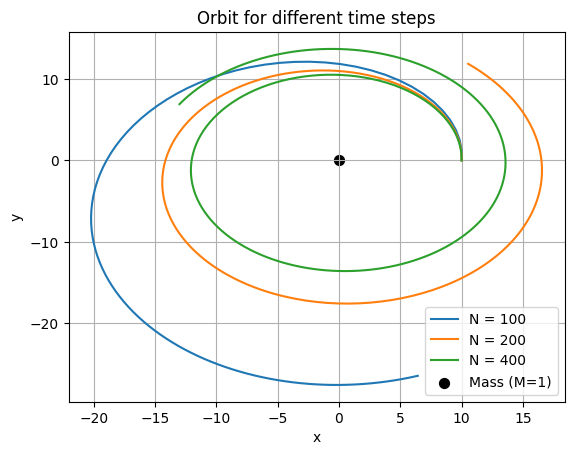

In [23]:
G = 1
M = 1

r_0 = np.array([10, 0])
v_0 = np.array([0, np.sqrt(0.1)])
omega = np.sqrt((G*M)/(np.linalg.norm(r_0)**3))
Period = (2 * np.pi) / omega
t_max = 2 * Period

results = {}
for N in [100, 200, 400]:
  t, r, v = orbit_solve(r_0, v_0, t_max, N)
  results[N] = r

plt.figure()

for N, r in results.items():
  plt.plot(r[:, 0], r[:, 1], label = f'N = {N}')

plt.scatter([0], [0], color = 'black',s = 50, label = 'Mass (M=1)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbit for different time steps')
plt.legend()
plt.grid()
plt.show()

# Exercise 3

In [25]:
def orbit_solve (r_0, v_0, t_max, N, method):
  time_step = t_max / N
  t = np.arange(0, t_max, time_step)
  r = np.zeros((N, 2))
  v = np.zeros((N, 2))
  r[0] = r_0
  v[0] = v_0
  if method == 'euler':
    for i in range (0, N-1):
     a = -(G*M*r[i])/(np.linalg.norm(r[i])**3)
     r[i+1] = r[i] + v[i]*time_step
     v[i+1] = v[i] + a*time_step
  if method == 'euler-cromer':
    for i in range (0, N-1):
     a = -(G*M*r[i])/(np.linalg.norm(r[i])**3)
     v[i+1] = v[i] + a*time_step
     r[i+1] = r[i] + v[i+1]*time_step
  if method == 'verlet':
    for i in range (0, N-1):
      a = -(G*M*r[i])/(np.linalg.norm(r[i])**3)
      a_t = -(G*M*r[i+1])/(np.linalg.norm(r[i+1])**3)
      r[i+1] = r[i] + v[i]*time_step + 0.5*a*time_step**2
      v[i+1] = v[i] + 0.5*(a + a_t)*time_step
  return t, r, v

# Exercise 4

/tmp/ipython-input-1291255840.py:21: RuntimeWarning: invalid value encountered in divide
  a_t = -(G*M*r[i+1])/(np.linalg.norm(r[i+1])**3)


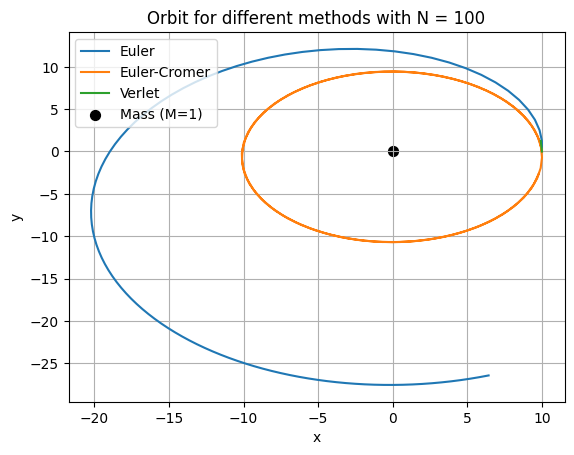

In [26]:
G = 1
M = 1

r_0 = np.array([10, 0])
v_0 = np.array([0, np.sqrt(0.1)])
omega = np.sqrt((G*M)/(np.linalg.norm(r_0)**3))
Period = (2 * np.pi) / omega
t_max = 2 * Period

plt.figure()

t1, r1, v1 = orbit_solve(r_0, v_0, t_max, 100, 'euler')
t2, r2, v2 = orbit_solve(r_0, v_0, t_max, 100, 'euler-cromer')
t3, r3, v3 = orbit_solve(r_0, v_0, t_max, 100, 'verlet')
plt.plot(r1[:, 0], r1[:, 1], label = 'Euler')
plt.plot(r2[:, 0], r2[:, 1], label = 'Euler-Cromer')
plt.plot(r3[:, 0], r3[:, 1], label = 'Verlet')

plt.scatter([0], [0], color = 'black', s = 50, label = 'Mass (M=1)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbit for different methods with N = 100')
plt.legend()
plt.grid()
plt.show()

/tmp/ipython-input-1291255840.py:21: RuntimeWarning: invalid value encountered in divide
  a_t = -(G*M*r[i+1])/(np.linalg.norm(r[i+1])**3)


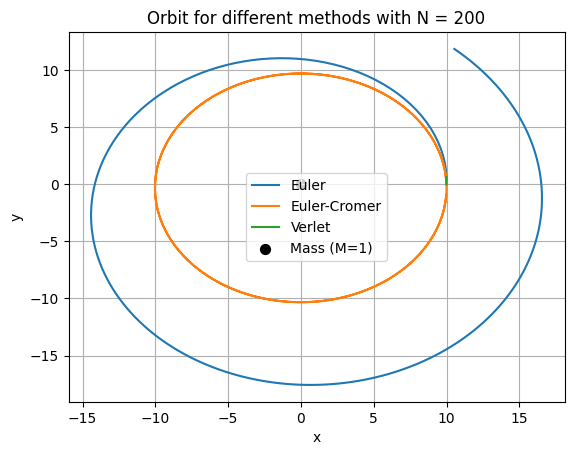

In [27]:
plt.figure()

t1, r1, v1 = orbit_solve(r_0, v_0, t_max, 200, 'euler')
t2, r2, v2 = orbit_solve(r_0, v_0, t_max, 200, 'euler-cromer')
t3, r3, v3 = orbit_solve(r_0, v_0, t_max, 200, 'verlet')
plt.plot(r1[:, 0], r1[:, 1], label = 'Euler')
plt.plot(r2[:, 0], r2[:, 1], label = 'Euler-Cromer')
plt.plot(r3[:, 0], r3[:, 1], label = 'Verlet')

plt.scatter([0], [0], color = 'black', s = 50, label = 'Mass (M=1)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbit for different methods with N = 200')
plt.legend()
plt.grid()
plt.show()

/tmp/ipython-input-1291255840.py:21: RuntimeWarning: invalid value encountered in divide
  a_t = -(G*M*r[i+1])/(np.linalg.norm(r[i+1])**3)


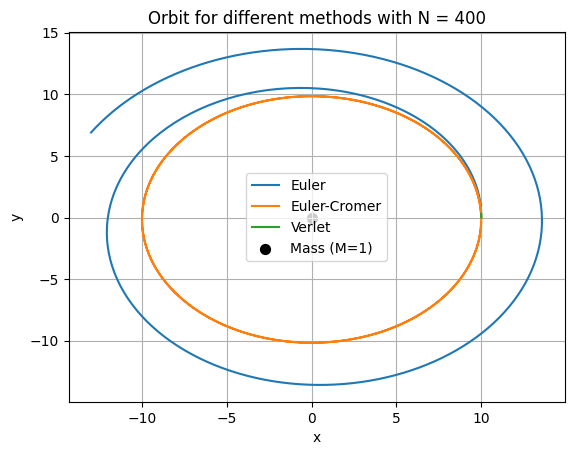

In [21]:
plt.figure()

t1, r1, v1 = orbit_solve(r_0, v_0, t_max, 400, 'euler')
t2, r2, v2 = orbit_solve(r_0, v_0, t_max, 400, 'euler-cromer')
t3, r3, v3 = orbit_solve(r_0, v_0, t_max, 400, 'verlet')
plt.plot(r1[:, 0], r1[:, 1], label = 'Euler')
plt.plot(r2[:, 0], r2[:, 1], label = 'Euler-Cromer')
plt.plot(r3[:, 0], r3[:, 1], label = 'Verlet')

plt.scatter([0], [0], color = 'black', s = 50, label = 'Mass (M=1)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbit for different methods with N = 400')
plt.legend()
plt.grid()
plt.show()